In [1]:
# pip install flask
# pip install streamlit
# pip install streamlit_drawable_canvas

### ImageNet
1) Imagenet is an image database that organizes a competition for image classfication. <br>
2) Imagenet provides the CNN model weight and based on those weights custom pretrained models are developed<br>
3) Using custom pre-trained models in CNN is referred to as using Transfer Learning Techniques<br>
4) VGG16, VGG19, ResNet,ResNet50, MobileNet, Inception etc. are exmaples of Transfer learning Techniques
These are custom CNN architectures used to implement image clasification

### VGG16
1) It uses Convolution with (3,3) filters with a stride of 1 and uses the 'same' padding with 
maxpool layer throughout the architecture<br>
2) In the end it has three fully connected layers followed by a softmax activation for output<br>

#### VGG16 Architecture
<img src="vgg16_arch.jpeg">

#### Dataset -> https://www.kaggle.com/datasets/puneet6060/intel-image-classification

#### Data Augmentation Visualization

https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

### Intel Image Classification using VGG16 and Data Augmentation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
# from tensorflow.keras.applications.mobilenet import preprocess_input

In [6]:
img_shape = (300,300)
BATCH_SIZE = 16

In [7]:
# E:\Img_datasets\Intel_Image\seg_train
# E:\Img_datasets\Intel_Image
train_dir = "E:\\Img_datasets\\Intel_Image\\seg_train"
test_dir = "E:\\Img_datasets\\Intel_Image\\seg_test"

### Data Augmentation

In [9]:
total = 2191 + 2271 + 2404 + 2512 + 2274 + 2382
print(total)
print(total*0.01)

14034
140.34


In [10]:
train_gen = ImageDataGenerator(
            rotation_range=20,horizontal_flip=True,vertical_flip=True,
            width_shift_range=0.2,height_shift_range=0.2,
            preprocessing_function=preprocess_input,
            zoom_range=0.2,shear_range=0.3,validation_split=0.99)


train = train_gen.flow_from_directory(train_dir,target_size=img_shape,shuffle=True,
        class_mode='categorical',batch_size=BATCH_SIZE,subset='training')

Found 143 images belonging to 6 classes.


In [12]:
total_test = 437 + 474 + 553 + 525 + 510 + 501
print(total_test)

3000


In [11]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.01)

test = test_gen.flow_from_directory(test_dir,target_size=img_shape,shuffle=False,
        class_mode='categorical',batch_size=BATCH_SIZE,subset='validation')

Found 28 images belonging to 6 classes.


In [12]:
(16*8 + 15)

143

In [13]:
type(train)
for i in range(9):
    print(train[i][0].shape)

(16, 300, 300, 3)
(16, 300, 300, 3)
(16, 300, 300, 3)
(16, 300, 300, 3)
(16, 300, 300, 3)
(16, 300, 300, 3)
(16, 300, 300, 3)
(16, 300, 300, 3)
(15, 300, 300, 3)


In [14]:
for i in range(9):
    print(train[i][1].shape)

(16, 6)
(16, 6)
(16, 6)
(16, 6)
(16, 6)
(16, 6)
(16, 6)
(16, 6)
(15, 6)


In [16]:
print(train[0][1])

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [17]:
train_samples = train.samples
test_samples = test.samples
print(train_samples)
print(test_samples)

143
28


In [19]:
classes = list(train.class_indices.keys())
print(train.class_indices)  # dict
print('Classes',classes)
num_classes = len(classes)
print(num_classes)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
Classes ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
6


In [20]:
print(train.class_indices.values())

dict_values([0, 1, 2, 3, 4, 5])


In [22]:
print(train.labels)
print(len(train.labels))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
143


In [23]:
print(test.labels)
print(len(test.labels))

[0 0 0 0 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5]
28


#### Displaying augmented images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


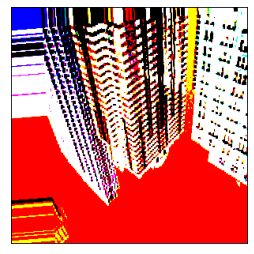

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


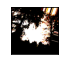

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


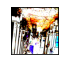

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


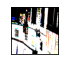

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


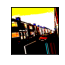

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


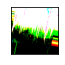

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


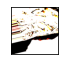

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


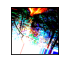

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


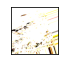

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


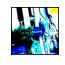

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


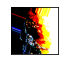

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


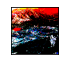

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


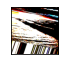

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


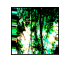

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


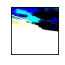

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


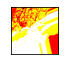

In [25]:
plt.figure(figsize=(20,20))
idx=0
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train[0][0][idx])
    idx += 1
    plt.show()

In [39]:
# it = datagen.flow_from_directory(samples, batch_size=1)
# for i in range(9):
#     plt.subplot(330 + 1 + i)
#     batch = train.next()
#     image = batch[0].astype('uint8')
#     plt.imshow(image)
# plt.show()

### Build The VGG16 Model

In [27]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop

#### Import Saved weights from Imagenet for VGG16 model

In [28]:
vgg16m = VGG16(weights='imagenet',include_top=False,input_shape=(300,300,3))
vgg16m.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [30]:
m1 = Sequential()
vgg16m.trainable = False
m1.add(vgg16m)
m1.add(GlobalAveragePooling2D())

m1.add(Dense(64,activation='relu'))
m1.add(BatchNormalization())  # prevention of overfitting
m1.add(Dropout(0.2))
m1.add(Dense(6,activation='softmax'))   # output layer

m1.compile(optimizer=Adam(beta_1=0.9),loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
h1 = m1.fit(train,validation_data=test,epochs=5)

Epoch 1/5
9/9 [==============================] - 203s 23s/step - loss: 1.7271 - accuracy: 0.3357 - val_loss: 2.6251 - val_accuracy: 0.4286
Epoch 2/5
9/9 [==============================] - 210s 24s/step - loss: 1.0037 - accuracy: 0.6084 - val_loss: 1.5717 - val_accuracy: 0.5714
Epoch 3/5
9/9 [==============================] - 209s 23s/step - loss: 0.7284 - accuracy: 0.6993 - val_loss: 1.0762 - val_accuracy: 0.6071
Epoch 4/5
9/9 [==============================] - 196s 22s/step - loss: 0.6448 - accuracy: 0.8042 - val_loss: 0.7536 - val_accuracy: 0.7143
Epoch 5/5
9/9 [==============================] - 207s 23s/step - loss: 0.6260 - accuracy: 0.7832 - val_loss: 0.6847 - val_accuracy: 0.7143


In [28]:
# Train = 143, Test = 58
h1 = m1.fit(train,validation_data=test,epochs=5)
# epochs = no of iterations

Epoch 1/5
9/9 [==============================] - 238s 27s/step - loss: 2.0983 - accuracy: 0.2657 - val_loss: 2.6223 - val_accuracy: 0.3966
Epoch 2/5
9/9 [==============================] - 239s 28s/step - loss: 1.2609 - accuracy: 0.4615 - val_loss: 1.7124 - val_accuracy: 0.5345
Epoch 3/5
9/9 [==============================] - 246s 28s/step - loss: 0.9254 - accuracy: 0.6503 - val_loss: 1.2029 - val_accuracy: 0.6897
Epoch 4/5
9/9 [==============================] - 254s 29s/step - loss: 0.8138 - accuracy: 0.7063 - val_loss: 0.8938 - val_accuracy: 0.7759
Epoch 5/5
9/9 [==============================] - 254s 29s/step - loss: 0.6382 - accuracy: 0.7972 - val_loss: 0.7615 - val_accuracy: 0.7586


In [29]:
r1 = pd.DataFrame(h1.history)
r1['Epcohs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epcohs
0,2.098320,0.265734,2.622264,0.396552,0
1,1.260864,0.461538,1.712401,0.534483,1
2,0.925433,0.650350,1.202892,0.689655,2
3,0.813835,0.706294,0.893750,0.775862,3
4,0.638153,0.797203,0.761550,0.758621,4


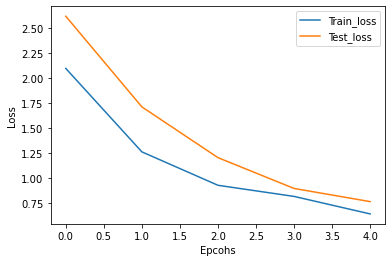

In [30]:
plt.plot(r1['Epcohs'],r1['loss'],label='Train_loss')
plt.plot(r1['Epcohs'],r1['val_loss'],label='Test_loss')
plt.xlabel('Epcohs')
plt.ylabel('Loss')
plt.legend()
plt.show()

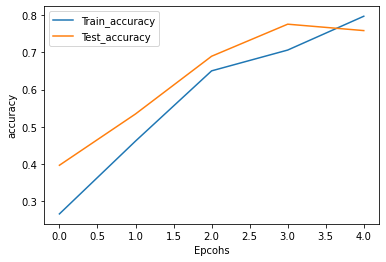

In [31]:
plt.plot(r1['Epcohs'],r1['accuracy'],label='Train_accuracy')
plt.plot(r1['Epcohs'],r1['val_accuracy'],label='Test_accuracy')
plt.xlabel('Epcohs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [37]:
ypred = m1.predict(test)
print(ypred)

[[9.98733103e-01 1.26165196e-05 1.47969258e-05 1.05084587e-06
  1.08132542e-06 1.23741594e-03]
 [9.82845247e-01 1.01670057e-05 1.98425369e-05 4.81152761e-04
  3.17403537e-05 1.66119561e-02]
 [9.99723852e-01 4.11331621e-06 4.89908523e-08 3.21663748e-07
  2.33094011e-06 2.69414653e-04]
 [9.87050295e-01 3.10671167e-05 3.86893458e-04 3.54459576e-06
  9.99173426e-06 1.25182113e-02]
 [9.99940157e-01 1.25758319e-08 4.05004073e-07 3.28246728e-07
  4.48893370e-05 1.42767640e-05]
 [1.54173031e-01 3.30208600e-01 1.32993907e-01 2.12479085e-01
  1.12587161e-01 5.75581603e-02]
 [9.98541594e-01 3.25333895e-05 6.17126773e-07 3.62412493e-07
  2.80527934e-06 1.42222364e-03]
 [7.71428108e-01 1.25011876e-02 9.18943842e-04 9.92041081e-04
  6.24558283e-03 2.07914159e-01]
 [5.14644897e-03 9.51658368e-01 2.20418628e-02 9.77414474e-03
  6.38243277e-03 4.99666017e-03]
 [2.19591502e-02 8.64603937e-01 3.34373340e-02 9.13651020e-04
  2.04225592e-02 5.86633794e-02]
 [1.29595190e-01 8.41170728e-01 6.39439654e-03 9.7

In [38]:
print(len(ypred))

58


In [39]:
ypred = [np.argmax(i) for i in ypred]
print(ypred)

[0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 0, 1, 0, 4, 4, 4, 4, 4, 4, 4, 5, 0, 0, 5, 0, 5, 0, 5, 5, 5]


In [40]:
print(test.labels)

[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3
 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5]


In [41]:
from sklearn.metrics import confusion_matrix,classification_report

In [42]:
cm = confusion_matrix(test.labels,ypred)
print(cm)
print(classification_report(test.labels,ypred))

[[ 7  1  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  6  4  0  0]
 [ 2  1  0  0  7  0]
 [ 4  0  0  0  0  6]]
              precision    recall  f1-score   support

           0       0.54      0.88      0.67         8
           1       0.82      1.00      0.90         9
           2       0.65      1.00      0.79        11
           3       1.00      0.40      0.57        10
           4       1.00      0.70      0.82        10
           5       1.00      0.60      0.75        10

    accuracy                           0.76        58
   macro avg       0.83      0.76      0.75        58
weighted avg       0.84      0.76      0.75        58



### MobileNet

<img src="mobilenet_arch.png">

### Major Project
Implement the Intel Image project using MobileNet Transfer learning technique

Link Used -> https://www.tensorflow.org/api_docs/python/tf/keras/applications/

Dataset -> https://www.kaggle.com/datasets/puneet6060/intel-image-classification

In [43]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

### MobileNet Architecture

In [44]:
mbnet = MobileNet(weights='imagenet',include_top=False,input_shape=(300,300,3))
mbnet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 150, 150, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 150, 150, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 150, 150, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 150, 150, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 150, 150, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 150, 150, 32

In [71]:
# from google.colab import drive
# drive.mount('/content/drive')

# df  = pd.read_csv('/content/drive/My Drive/Colab_files/house_price2.csv')
# df.head()